In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Naïve Bayes Model Accuracy: 0.98


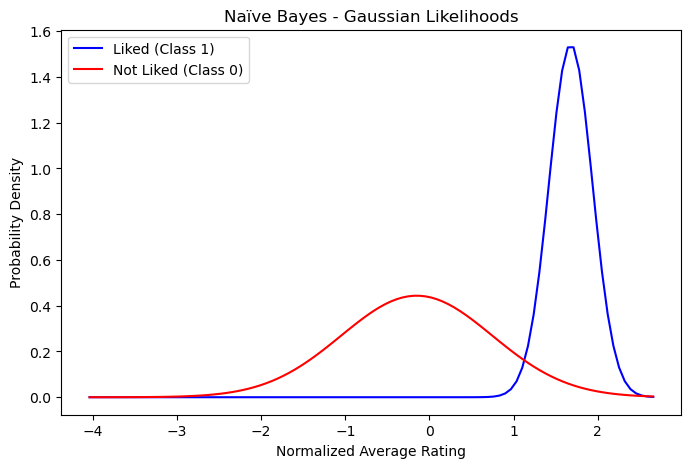

In [4]:
# Load dataset
df = pd.read_csv("Movie_Data_File.csv")

# Define labels
df['Liked'] = (df['Average_rating'] >= 4.0).astype(int)

# Normalize features
df['Average_rating'] = (df['Average_rating'] - df['Average_rating'].mean()) / df['Average_rating'].std()

# Compute prior probabilities
p_liked = np.mean(df['Liked'])
p_not_liked = 1 - p_liked

# Compute mean and variance for Gaussian distribution
liked_mean = df[df['Liked'] == 1]['Average_rating'].mean()
liked_var = df[df['Liked'] == 1]['Average_rating'].var()

not_liked_mean = df[df['Liked'] == 0]['Average_rating'].mean()
not_liked_var = df[df['Liked'] == 0]['Average_rating'].var()

# Gaussian likelihood function
def gaussian_probability(x, mean, var):
    return (1 / np.sqrt(2 * np.pi * var)) * np.exp(-((x - mean) ** 2) / (2 * var))

# Naïve Bayes classifier
def classify(x):
    prob_liked = gaussian_probability(x, liked_mean, liked_var) * p_liked
    prob_not_liked = gaussian_probability(x, not_liked_mean, not_liked_var) * p_not_liked
    return 1 if prob_liked > prob_not_liked else 0

# Predict labels
df['Predicted'] = df['Average_rating'].apply(classify)

# Evaluate accuracy
accuracy = np.mean(df['Predicted'] == df['Liked'])
print(f"Naïve Bayes Model Accuracy: {accuracy:.2f}")

# Plot probability distributions
plt.figure(figsize=(8, 5))
x_vals = np.linspace(df['Average_rating'].min(), df['Average_rating'].max(), 100)
plt.plot(x_vals, gaussian_probability(x_vals, liked_mean, liked_var), label="Liked (Class 1)", color='blue')
plt.plot(x_vals, gaussian_probability(x_vals, not_liked_mean, not_liked_var), label="Not Liked (Class 0)", color='red')
plt.xlabel("Normalized Average Rating")
plt.ylabel("Probability Density")
plt.title("Naïve Bayes - Gaussian Likelihoods")
plt.legend()
plt.show()